- Topic Modeling은 문서 집합에서 Topic을 찾는 과정.
- 문서의 주제를 알아내는 일이 중요한 곳에서 많이 사용.
- 잠재 디리클레 할당(LDA)은 토픽 모델링의 대표적인 알고리즘.

<br>

- LDA에서 **문서들은 토픽들의 혼합으로 구성**, **토픽들은 확률분포에 기반해 단어들을 생성한다 가정**.
- 데이터가 주어지면 LDA는 문서가 생성되던 과정을 역추적.

<br>

**참고**
- One of the basic ideas to achieve topic modeling with Word2Vec is to **use the output vectors of Word2Vec as an input to any clustering algorithm.** This will result in a group of clusters, and each represents a topic. This approach will produce similar but less accurate LDA results.
    - Topic Modeling에선 LDA를 쓰는게 좋다는 의미.
- Top2Vec 한번 알아보세요. (Doc2Vec을 알고있어야)
    - https://github.com/ddangelov/Top2Vec
    - https://towardsdatascience.com/top2vec-new-way-of-topic-modelling-bea165eeac4a

# Latent Dirichlet Allocation, LDA Overview

<br>

- LDA를 블랙박스로 취급하고 예시를 한번 봐보자.

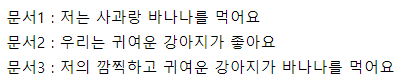

- LDA 수행 시 문서집합에서 토픽이 몇 개가 존재할지 가정하는 것은 사용자가 해야할 일.
- 여기선 2개의 토픽을 (k=2) 찾는다 해보자.
    - 입력은 전처리 과정을 거친 DTM이라 가정.
 
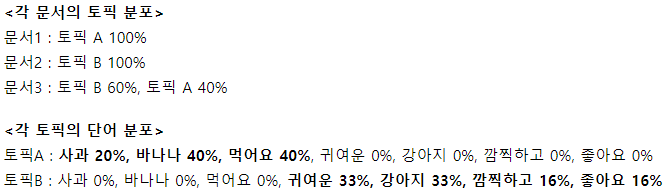
 
- LDA는 토픽의 제목을 정해주지 않지만, 사용자는 위 결과로부터
- 두 토픽이 각각 **과일에 대한 토픽**과 **강아지에 대한 토픽**이라고 판단해 볼 수있음.

# LDA Assumption

<br>

- LDA는 문서 집합으로부터 어떤 토픽이 존재하는지를 알아내기 위한 알고리즘.
- 빈도수 기반 표현 방법인 BoW의 행렬 DTM 또는 TF-IDF행렬을 입력으로 받음. 
    - **단어 순서는 신경쓰지 않는다**는 의미.
- 각각의 문서는 다음과 같은 과정을 거쳐 작성되었다고 가정.
    1. 문서에 사용할 **단어 개수 N** 지정.
        - 5개의 단어 선택.
    2. 문서에서 사용할 **토픽의 혼합**을 **확률분포에 기반해 결정**.
        - 토픽이 2개일때, 강아지 토픽을 60%, 과일 토픽을 40%와 같이 선택할 수 있음.
    3. 문서에 사용할 각 단어를 다음과 같이 정함.
        4. (3-1) **토픽 분포에서 토픽 T를 확률적으로 선택**
            - 60%의 확률로 강아지 토픽 선택, 40%의 확률로 과일 토픽 선택
        5. (3-2) 선택한 토픽 T에서 **단어의 출현 확률 분포에 기반해, 문서에 사용할 단어 선택**
            - 강아지 토픽을 선택했다면, 33%의 확률로 강아지 란 단어를 선택할 수 있음.
            - 3번 과정을 반복하면서 문서를 완성
- 이런 과정을 통해 문서가 작성되었다는 가정 하에 LDA는 토픽을 뽑아내기 위해
- **위 과정을 역으로 추적하는 reverse engineering을 수행**.

<br>

(인터넷 내용)  <br>
- LDA에서 토픽들은 디리클레 분포를 따른다고 가정.
- https://bab2min.tistory.com/568 너무 어렵고 이해하려면 시간 좀 걸릴듯. 

# LDA Process

<br>

LDA의 수행 과정을 정리해보면 다음과 같다.  <br>

1. 사용자는 알고리즘에게 **토픽의 개수 k**를 알려준다.
    - LDA는 토픽 개수 k를 입력받으면, **k개의 토픽이 M개의 전체 문서에 걸쳐 분포되어 있다고 가정.**
2. **모든 단어를 k개 중 하나의 토픽에 할당**한다.
    - LDA는 모든 문서의 모든 단어에 대해 **k개 중 하나의 토픽을 랜덤으로 할당.**
    - 이 작업 후 **각 문서는 토픽을 가지며**, **토픽은 단어 분포를 가지는 상태**.
        - 랜덤으로 할당했기 때문에 이 결과는 틀린 상태나 마찬가지.
        - if 한 단어가 한 문서에서 2회 이상 등장했다면, 각 단어는 서로 다른 토픽에 할당됐을 수 있음.
3. 모든 문서의 모든 단어에 대해 **아래의 사항을 반복**한다.
4. 어떤 문서의 **각 단어 w**는 자신은 **잘못된 토픽에 할당**되어 있지만, **다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태**라고 가정.
    - 이에따라 단어 w는 아래의 **두가지 기준에 따라서 토픽이 재할당** 됨.
        1. $P(topic \, t \, | \, document \, d)$ : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
        2. $P(word \, w \, | \, topic \, t)$ : 각 토픽들 t에서 해당 단어 w의 분포

<br>

- 이를 반복하면 모든 할당이 완료된 수렴 상태가 됨.

- 다음의 예시를 봐보자.

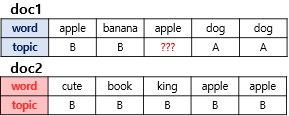

- 두개의 문서 doc1, doc2.
- doc1의 세번째 단어 apple의 토픽을 결정하고자 한다.

<br>

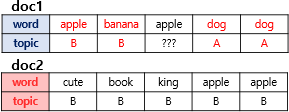

- 첫번째 기준 ($P(topic \, t \, | \, document \, d)$) : **문서 doc1의 단어들이 어떤 토픽에 해당하는지** look.
- doc1의 단어들은 토픽 A와 B에 50:50의 비율로 할당되어져 있음.
- 이 기준에 따르면 apple은 **토픽 A 또는 B 둘 중 어디에도 속할 가능성**이있음.

<br>

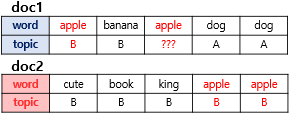

- 두번째 기준 ($P(word \, w \, | \, topic \, t)$) : **apple이 전체 문서에서 어떤 토픽에 할당되어 있는지** look.
- 살펴보니 apple은 **토픽 B에 할당될 가능성**이 높음.

<br>

- 이 두가지 기준을 참고해 LDA는 doc1의 apple을 어떤 토픽에 할당할지 결정.
    - Maybe 토픽 B에 할당될 것.

# Difference between LSA and LDA

<br>

- LSA는 **DTM을 차원축소**, **축소된 차원에서 근접 단어들을 토픽으로 묶음.**
- LDA는 **단어가 특정 토픽에 존재할 확률** & **문서에 특정 토픽이 존재할 확률**을 **결합확률로 추정**해 토픽을 추출.

# Example with gensim

## Data Load & Preprocessing

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data # Data Loading

news_df = pd.DataFrame({'document' : documents}) # raw data to dataframe

news_df['clean_doc'] = news_df['document'].str.replace('[^a-zA-Z]', ' ') # 특수문자 제거, 알파벳 제외 전부 공백으로.
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3])) # 길이 3 이하 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower()) # 대문자->소문자

stop_words = stopwords.words('english') # 불용어 사전 load
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 공백 기준 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) # 불용어 제거

C:\Users\CHEOLH~1\AppData\Local\Temp/ipykernel_17468/1724857794.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace('[^a-zA-Z]', ' ') # 특수문자 제거, 알파벳 제외 전부 공백으로.


## 정수 인코딩, 단어집합 생성

In [3]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

- 각 단어에 정수 인코딩을 하는 동시에, 뉴스에서의 단어의 빈도수를 기록.
- 각 단어를 **(word_id, word_frequency)**의 형태로 변환.
    - word_id는 **단어가 정수 인코딩 된 값**
    - word_frequency는 **해당 뉴스에서의 해당 단어의 빈도수**
        - gensim.corpora.Dictionary()를 써서 손쉽게 구할 수 있음.
        - Dictionary.doc2bow() 를 통해 문서 데이터를 수치화. (document to BoW)

In [4]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 2),
 (22, 2),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 4),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 2),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1)]

    (42, 2) : 정수 인코딩이 42로 할당된 단어가 첫번째 뉴스에서 2번 등장했음을 의미.
    그럼 이 단어는 무슨 단어였을까?
    생성한 gensim.corpora.Dictionary() 객체 dictionary에 [index]를 통해 볼 수 있음.

In [5]:
dictionary[42]

'seem'

    총 학습된 단어는 몇개일까?
    len(dictionary)로 볼 수 있다.

In [6]:
len(dictionary)

64281

## LDA Model Training

<br>

- 기존 뉴스 데이터가 20개의 카테고리를 가지고 있었으니, 토픽 개수 t=20으로 두고 학습시켜보자.

In [7]:
import gensim

NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus,
    num_topics = NUM_TOPICS,
    id2word = dictionary, # word id를 word로 mapping
    passes = 15 # 훈련 중 pass through되는 corpus 수. 알고리즘 동작횟수.
)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.006*"income" + 0.006*"maine" + 0.005*"parking" + 0.004*"main"')
(1, '0.014*"armenian" + 0.013*"said" + 0.012*"people" + 0.012*"armenians"')
(2, '0.013*"thanks" + 0.013*"windows" + 0.012*"would" + 0.011*"know"')
(3, '0.022*"file" + 0.014*"program" + 0.012*"output" + 0.011*"window"')
(4, '0.019*"morris" + 0.015*"pitcher" + 0.014*"stats" + 0.008*"hall"')
(5, '0.044*"space" + 0.015*"nasa" + 0.009*"launch" + 0.008*"earth"')
(6, '0.016*"state" + 0.013*"guns" + 0.011*"states" + 0.010*"government"')
(7, '0.015*"would" + 0.014*"like" + 0.010*"good" + 0.009*"time"')
(8, '0.020*"period" + 0.016*"play" + 0.011*"power" + 0.008*"goal"')
(9, '0.009*"people" + 0.006*"would" + 0.005*"president" + 0.004*"years"')
(10, '0.015*"sale" + 0.014*"price" + 0.012*"shipping" + 0.011*"offer"')
(11, '0.035*"games" + 0.034*"team" + 0.029*"game" + 0.028*"hockey"')
(12, '0.011*"water" + 0.005*"theory" + 0.005*"model" + 0.004*"pope"')
(13, '0.013*"would" + 0.012*"people" + 0.007*"think" + 0.006*"believe"')
(14,

https://datascience.stackexchange.com/questions/20076/word2vec-vs-sentence2vec-vs-doc2vec
참고.

## LDA Visualization

<br>

pyLDAvis 설치 필요. skip.

## 문서 별 토픽 분포 

<br>

- 5.3에서 토픽 별 단어 분포는 봤음.
- 근데 아직 문서 별 토픽 분포는 확인 못했음.
    - 각 문서의 토픽 분포는 훈련된 LDA모델 (ldamodel[ ])에 전체 데이터가 정수 인코딩 된결과를 넣으면 확인 가능.
    - 상위 10개 문서에 대해서만 토픽 분포를 확인해보자.

In [12]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==10:
        break
    print(f'{i} 번째 문서의 topic 비율은 : {topic_list}')

0 번째 문서의 topic 비율은 : [(1, 0.1580234), (3, 0.1267959), (13, 0.40997368), (15, 0.29203892)]
1 번째 문서의 topic 비율은 : [(4, 0.10663657), (7, 0.27582657), (9, 0.033467706), (12, 0.05422384), (13, 0.510085)]
2 번째 문서의 topic 비율은 : [(2, 0.02778821), (7, 0.28119168), (9, 0.13723852), (13, 0.17180184), (14, 0.020175053), (15, 0.35049137)]
3 번째 문서의 topic 비율은 : [(1, 0.031903587), (2, 0.07563972), (7, 0.28413877), (13, 0.15457116), (14, 0.29422778), (19, 0.14837773)]
4 번째 문서의 topic 비율은 : [(0, 0.35203242), (7, 0.4294207), (11, 0.18705583)]
5 번째 문서의 topic 비율은 : [(7, 0.14354545), (13, 0.7596919), (18, 0.058091212)]
6 번째 문서의 topic 비율은 : [(2, 0.28322384), (3, 0.13565645), (6, 0.016281229), (7, 0.16321637), (10, 0.047396593), (12, 0.11526415), (13, 0.14669926), (19, 0.08379398)]
7 번째 문서의 topic 비율은 : [(7, 0.45928094), (13, 0.28792396), (15, 0.23884091)]
8 번째 문서의 topic 비율은 : [(0, 0.030553415), (3, 0.16359253), (7, 0.27870867), (9, 0.2592051), (13, 0.24578239)]
9 번째 문서의 topic 비율은 : [(0, 0.04204676), (2, 0.056394

    (숫자, 확률)은 각각 토픽 번호와 해당 토픽이 해당 문서에서 차지하는 분포도를 의미.
    0번째 문서의 (1, 0.1580234)sms 1번 토픽이 15%의 분포도를 가짐을 의미.
    좀더 깔끔하게 DataFrame으로 출력해보자.

In [13]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내기.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = (topic_list[0] if ldamodel.per_word_topics else topic_list)
        # 각 문서에 대해 비중이 높은 토픽 순으로 정렬.
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 모든 문서에 대해 각각 수행.
        
        # 몇 번 토픽인지와 비중을 나눠 저장
        for j, (topic_num, prop_topic) in enumerate(doc):
            # 가장 앞에 있는 토픽이라면
            if j == 0:
                # 가장 비중이 높은 토픽, 그 토픽의 비중, 전체 토픽의 비중 저장
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_list]), ignore_index = True)
            else:
                break
    return topic_table

topicTable = make_topictable_per_doc(ldamodel, corpus)
topicTable = topicTable.reset_index() # 인덱스 열 추가
topicTable.columns = ['문서번호', '가장 비중 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topicTable.head(10)

,문서번호,가장 비중 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,13.0,0.4099,"[(1, 0.15806337), (3, 0.12680243), (13, 0.4099..."
1,1,13.0,0.5101,"[(4, 0.10663657), (7, 0.27584442), (9, 0.03346..."
2,2,15.0,0.3505,"[(2, 0.027787732), (7, 0.28116268), (9, 0.1372..."
3,3,14.0,0.2942,"[(1, 0.031900328), (2, 0.075622186), (7, 0.284..."
4,4,7.0,0.4294,"[(0, 0.35203272), (7, 0.42942038), (11, 0.1870..."
5,5,13.0,0.7597,"[(7, 0.14345202), (13, 0.7597479), (18, 0.0581..."
6,6,2.0,0.2832,"[(2, 0.2832437), (3, 0.13565914), (6, 0.016281..."
7,7,7.0,0.4593,"[(7, 0.45934528), (13, 0.28786123), (15, 0.238..."
8,8,7.0,0.2787,"[(0, 0.030553497), (3, 0.16342857), (7, 0.2787..."
9,9,7.0,0.5558,"[(0, 0.04204676), (2, 0.05638822), (6, 0.01935..."


In [18]:
topicTable.iloc[0], topicTable.iloc[0]['각 토픽의 비중']

(문서번호                                                            0
 가장 비중 높은 토픽                                                  13.0
 가장 높은 토픽의 비중                                               0.4099
 각 토픽의 비중        [(1, 0.15806337), (3, 0.12680243), (13, 0.4099...
 Name: 0, dtype: object,
 [(1, 0.15806337), (3, 0.12680243), (13, 0.4099435), (15, 0.29202262)])

# Example with sklearn

<br>

## Data Exploring

<br>

- 15년동안 발행되었던 뉴스 기사 제목을 모아둔 영어 데이터.

In [19]:
import pandas as pd
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv',
                           filename='abcnews-date-text.csv')
data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False)

C:\ProgramData\Anaconda3\envs\WorkBase\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
len(data)

1082168

    상당히 크다.

In [21]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


    필요한 데이터는 텍스트 데이터. headline_text column.
    따로 빼서 저장하자.

In [22]:
text = data[['headline_text']]
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


## Text Preprocessing

<br>

- 불용어 제거, 표제어 추출, 길이가 짧은 단어 제거 를 진행.

In [23]:
import nltk
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1) # 단어 토큰화
text.head()

C:\Users\CHEOLH~1\AppData\Local\Temp/ipykernel_17468/3912139840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1) # 단어 토큰화


,headline_text
0,"[aba, decides, against, community, broadcastin..."
1,"[act, fire, witnesses, must, be, aware, of, de..."
2,"[a, g, calls, for, infrastructure, protection,..."
3,"[air, nz, staff, in, aust, strike, for, pay, r..."
4,"[air, nz, strike, to, affect, australian, trav..."


In [24]:
# 불용어 제거 
from nltk.corpus import stopwords

stop = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in stop])
text.head()

C:\Users\CHEOLH~1\AppData\Local\Temp/ipykernel_17468/171303535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in stop])


,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [26]:
# 표제어 추출
# 3인칭 단수 표현 -> 1인칭
# 과거형 동사 -> 현재형 동사
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
text.head()

[nltk_data] Downloading package wordnet to C:\Users\Cheol Hee
[nltk_data]     Kim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
C:\Users\CHEOLH~1\AppData\Local\Temp/ipykernel_17468/2947165745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


,headline_text
0,"[aba, decide, community, broadcast, licence]"
1,"[act, fire, witness, must, aware, defamation]"
2,"[g, call, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [27]:
# 길이가 3 이하인 단어 제거
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])
tokenized_doc[:5]

0       [decide, community, broadcast, licence]
1      [fire, witness, must, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object

## TF-IDF Matrix

<br>

- TfidfVectorizer는 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용함.
- 또 역토큰화 진행.

In [28]:
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc

C:\Users\CHEOLH~1\AppData\Local\Temp/ipykernel_17468/402328125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = detokenized_doc


In [29]:
text['headline_text'][:5]

0       decide community broadcast licence
1       fire witness must aware defamation
2    call infrastructure protection summit
3                   staff aust strike rise
4      strike affect australian travellers
Name: headline_text, dtype: object

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=2000) # 상위 2000개 단어 보존
X = vectorizer.fit_transform(text['headline_text'])
X.shape

(1082168, 2000)

    1082168 * 2000 의 크기를 가진 TF-IDF 행렬이 생성 됐음.
    이 행렬에 대해 LDA를 수행하자.

## Topic-Modeling

In [32]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(
    n_components = 10, # 토픽 수
    learning_method = 'online', # 데이터가 크면 batch보다 online이 더 빠름.
    random_state = 666,
    max_iter = 1
)

lda_top = lda_model.fit_transform(X)

lda_model.components_, lda_model.components_.shape

(array([[1.00003613e-01, 1.00003361e-01, 1.00005125e-01, ...,
         1.00007241e-01, 1.00006293e-01, 1.00004168e-01],
        [1.00009315e-01, 1.00003865e-01, 1.00004402e-01, ...,
         1.00005391e-01, 1.00004257e-01, 1.00005321e-01],
        [1.00005609e-01, 1.00002168e-01, 1.00003626e-01, ...,
         1.00005783e-01, 1.00000859e-01, 1.00004099e-01],
        ...,
        [1.00005536e-01, 1.00001309e-01, 1.00002538e-01, ...,
         1.00004417e-01, 1.00003294e-01, 1.00005386e-01],
        [1.00002676e-01, 1.00001716e-01, 1.04586250e+03, ...,
         1.00006514e-01, 1.00002363e-01, 1.00005532e-01],
        [1.00004136e-01, 3.25362972e+02, 1.00001537e-01, ...,
         1.00006839e-01, 1.00006006e-01, 6.69332358e+02]]),
 (10, 2000))

In [33]:
terms = vectorizer.get_feature_names() # 단어 집합 생성

def get_topics(components, feature_names, n=5):
    for index, topic in enumerate(components):
        print('Topic %d :' % (index+1), [(feature_names[i], topic[i],round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_, terms)

Topic 1 : [('police', 10314.345766477652, 2), ('sydney', 7198.479584580489, 2), ('attack', 5844.419597920303, 2), ('world', 5719.9203057142295, 2), ('kill', 5023.270318000715, 2)]
Topic 2 : [('charge', 7319.043624735787, 2), ('perth', 5557.323841289169, 2), ('murder', 4594.806005465749, 2), ('years', 4450.326633865232, 2), ('jail', 4005.397592307723, 2)]
Topic 3 : [('rural', 5000.9566248016645, 2), ('interview', 4971.564531814618, 2), ('north', 4552.797553779649, 2), ('drug', 3759.5052071027403, 2), ('people', 3675.9023944058263, 2)]
Topic 4 : [('trump', 9687.416079882154, 2), ('election', 6466.3207300905415, 2), ('adelaide', 5941.921569420275, 2), ('make', 4788.393929949522, 2), ('crash', 4672.973683972874, 2)]
Topic 5 : [('open', 4755.587092300138, 2), ('warn', 4443.07664591653, 2), ('turnbull', 3534.0582461144795, 2), ('time', 3441.355794857643, 2), ('service', 3275.224041365131, 2)]
Topic 6 : [('change', 5138.424546955153, 2), ('home', 4972.115277837322, 2), ('year', 4918.632020181